<a href="https://colab.research.google.com/github/kg571852741/LSTM-RNN-FinancialForcasting/blob/main/RNN_bitcoin_pratice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recurrent Neural Network

## Part 1 - Data Preprocessing

### Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

In [ ]:
dataset_train = pd.read_csv('Bitcoin_price_train.csv')
training_set = dataset_train.iloc[:, 1:2].values
dataset_train

,date,close,open,high,low,volune,change
0,2021年7月14日,32820.7,32727.8,33051.9,31611.2,69.56K,0.0028
1,2021年7月13日,32728.1,33106.1,33307.7,32259.5,60.04K,-0.0116
2,2021年7月12日,33113.0,34228.3,34598.0,32662.8,63.24K,-0.0326
3,2021年7月11日,34227.7,33510.8,34580.6,33319.8,35.72K,0.0214
4,2021年7月10日,33510.6,33797.7,34221.0,33056.8,50.94K,-0.0085
...,...,...,...,...,...,...,...
1122,2018年6月18日,6719.8,6460.5,6794.5,6410.9,135.70K,0.0402
1123,2018年6月17日,6460.3,6505.8,6593.0,6452.1,90.67K,-0.0070
1124,2018年6月16日,6505.8,6410.0,6564.2,6358.0,108.79K,0.0149
1125,2018年6月15日,6410.3,6647.3,6655.8,6395.7,143.53K,-0.0356


### Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

### Creating a data structure with 60 timesteps and 1 output

In [ ]:
X_train = []
y_train = []
for i in range(60, 1127):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

### Reshaping

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialising the RNN

In [ ]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [ ]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

### Adding a second LSTM layer and some Dropout regularisation

In [ ]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [ ]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [ ]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

### Adding the output layer

In [ ]:
regressor.add(Dense(units = 1))

### Compiling the RNN

In [ ]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Fitting the RNN to the Training set

In [ ]:
regressor.fit(X_train, y_train, epochs = 100 , batch_size = 32)

Epoch 1/100
34/34 [==============================] - 11s 119ms/step - loss: 0.0220
Epoch 2/100
34/34 [==============================] - 4s 119ms/step - loss: 0.0054
Epoch 3/100
34/34 [==============================] - 4s 120ms/step - loss: 0.0041
Epoch 4/100
34/34 [==============================] - 4s 118ms/step - loss: 0.0035
Epoch 5/100
34/34 [==============================] - 4s 119ms/step - loss: 0.0032
Epoch 6/100
34/34 [==============================] - 4s 120ms/step - loss: 0.0031
Epoch 7/100
34/34 [==============================] - 4s 117ms/step - loss: 0.0031
Epoch 8/100
34/34 [==============================] - 4s 118ms/step - loss: 0.0030
Epoch 9/100
34/34 [==============================] - 4s 118ms/step - loss: 0.0027
Epoch 10/100
34/34 [==============================] - 4s 118ms/step - loss: 0.0025
Epoch 11/100
34/34 [==============================] - 4s 117ms/step - loss: 0.0033
Epoch 12/100
34/34 [==============================] - 4s 119ms/step - loss: 0.0022
Epoch 13/100

In [ ]:
regressor.save('drive.google.com/drive/folders/1hq5Eqow1HslGmWhCReYt3GWq9vwxs48u?usp=sharing')

INFO:tensorflow:Assets written to: drive.google.com/drive/folders/1hq5Eqow1HslGmWhCReYt3GWq9vwxs48u?usp=sharing/assets


INFO:tensorflow:Assets written to: drive.google.com/drive/folders/1hq5Eqow1HslGmWhCReYt3GWq9vwxs48u?usp=sharing/assets


In [ ]:
regressor.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_16 (LSTM)               (None, 60, 50)            10400     
_________________________________________________________________
dropout_16 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_17 (LSTM)               (None, 60, 50)            20200     
_________________________________________________________________
dropout_17 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_18 (LSTM)               (None, 60, 50)            20200     
_________________________________________________________________
dropout_18 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_19 (LSTM)               (None, 50)               

## Part 3 - Making the predictions and visualising the results

### Getting the real  price of 2018-2021




In [ ]:
dataset_test = pd.read_excel('Bitcoin_price_test.xlsx')
real__price= dataset_test.iloc[:, 1:20].values
real__price

array([[6598.4, 6513.8, 6774.5, 6442.3, '143.04K', 0.013],
       [6513.5, 6618.6, 6676.6, 6513.5, '150.19K', -0.016],
       [6619.5, 6349.1, 6680.0, 6275.0, '179.92K', 0.0397],
       [6366.8, 6398.5, 6445.1, 6284.7, '128.51K', -0.005],
       [6398.9, 6213.4, 6498.5, 6204.0, '189.33K', 0.0299],
       [6213.3, 5883.2, 6284.9, 5818.5, '206.96K', 0.0561],
       [5883.5, 6154.9, 6178.4, 5854.0, '156.05K', -0.0441],
       [6154.9, 6081.1, 6187.3, 6025.4, '133.42K', 0.012],
       [6082.1, 6256.9, 6267.7, 6060.0, '176.66K', -0.0279],
       [6256.6, 6155.1, 6331.2, 6101.7, '210.69K', 0.0166],
       [6154.6, 6167.9, 6248.3, 5785.3, '240.60K', -0.0021],
       [6167.3, 6055.2, 6259.0, 6032.8, '142.90K', 0.0184],
       [6055.7, 6728.2, 6739.7, 5955.0, '278.22K', -0.0999],
       [6728.0, 6765.8, 6797.5, 6695.1, '99.29K', -0.0055],
       [6765.4, 6752.3, 6812.7, 6575.1, '121.48K', 0.0019],
       [6752.4, 6719.8, 6839.5, 6681.5, '120.54K', 0.0049],
       [6719.8, 6460.5, 6794.5, 6410.9

### Getting the predicted  price of 2018





In [ ]:
dataset_total = pd.concat((dataset_train['close'], dataset_test['close']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 82):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted__price = regressor.predict(X_test)
predicted__price = sc.inverse_transform(predicted__price)
predicted__price

array([[7097.3403],
       [7062.9805],
       [7032.36  ],
       [7012.0073],
       [6982.0073],
       [6938.489 ],
       [6873.092 ],
       [6765.046 ],
       [6647.2725],
       [6543.963 ],
       [6482.2515],
       [6458.444 ],
       [6461.1123],
       [6469.3096],
       [6529.09  ],
       [6651.532 ],
       [6810.0796],
       [6965.841 ],
       [7069.1406],
       [7110.282 ],
       [7095.158 ],
       [7063.2046]], dtype=float32)

### Visualising the results

ConversionError: ignored

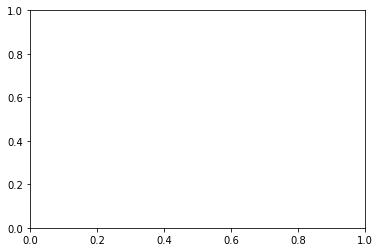

In [ ]:
plt.plot(real__price, color = 'red', label = 'test Bitcoin Price')
plt.plot(predicted__price, color = 'blue', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Time')
plt.ylabel('Bitcoin Price')
plt.legend()
plt.show()